# Data Mining And Visualization - 83676
---

##### Ido Sar Shalom, 212410146.
##### Tomer Griba, 325105625.

### Course Project - Part 2
---

###  Table of contents 
---

* [Decision Tree classifier](#Decision-Tree-classifier)
* [SVM classifier](#SVM-classifier)
* [Neural Network classifier](#Neural-Network-classifier)
* [Compare The Models](#Compare-The-Models)

In [86]:
# imports for the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN
from datetime import datetime 

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from joblib import dump, load

from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics  
from sklearn.model_selection import KFold

import sklearn.neural_network as nn
from sklearn import svm
from sklearn.metrics import classification_report
from scipy import stats 

In [87]:
df = pd.read_csv("./data/market_train_new.csv", index_col=0)
df = df.drop('Status', axis=1)  # stay with the categorical attribute 'Status_cat'

In [88]:
X = df.drop('Response', axis=1)
y = df['Response']
X_np = X.to_numpy()
y_np = y.to_numpy()

To evaluate the model we split the data set to train set and test set (= validation).<br>
We train the model <b> only </b> on the train set and evaluate it on the test set.

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42) 

In [90]:
print(y_train.value_counts())

0.0    1009
1.0     173
Name: Response, dtype: int64


In [91]:
# Balance the data
over = SMOTE(sampling_strategy=0.3, random_state = 42, k_neighbors = 5)
under = RandomUnderSampler(sampling_strategy=1, random_state = 42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.value_counts())
smote2_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train, columns =['Response'])], axis =1)
print(smote2_data['Response'].value_counts())

604
0.0    302
1.0    302
Name: Response, dtype: int64
0.0    302
1.0    302
Name: Response, dtype: int64


# Decision Tree classifier

#### Create Decision Tree classifier object, train it on the train set and predict the labels to the test set.<br>

In [92]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42) 

print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


We will adjust the following set of hyperparameters:
- max_features: max number of features considered for splitting a node
- max_depth: max number of levels in each decision tree
- min_samples_split: min number of data samples in a node before the node is split
- min_samples_leaf: min number of data samples allowed in a leaf node

## Random Hyperparameter Grid
Define a grid of hyperparameter ranges, and <b>randomly</b> sample from the grid, performing K-Fold CV with each combination of values.<br>


In [93]:
max_features = ['auto', 'log2', 4, 6, 8, 10, 12, 15, 17, 20, 25]

max_depth = [int(x) for x in range(3, 25)]
# max_depth.append(None)

min_samples_split = [int(x) for x in range(2, 25)]

min_samples_leaf = [int(x) for x in range(2, 25)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24],
 'max_features': ['auto', 'log2', 4, 6, 8, 10, 12, 15, 17, 20, 25],
 'min_samples_leaf': [2,
                      3,
                      4,
                      5,
                      6,
                      7,
                      8,
                      9,
                      10,
                      11,
                      12,
                      13,
                      14,
                      15,
                      16,
                      17,
                      18,
                      19,
                      20,
                      21,
        

In [94]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, scoring='accuracy', 
                                n_iter = 1000, cv = 10, verbose=2, random_state = 42, n_jobs = -1)
# clf_random = GridSearchCV(estimator = clf, param_grid = random_grid, scoring='accuracy', cv = 10, verbose=2, n_jobs = -1)

clf_random.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24],
                                        'max_features': ['auto', 'log2', 4, 6,
                                                         8, 10, 12, 15, 17, 20,
                                                         25],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20, 21, 22,
                                         

In [95]:
clf_random.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 10,
 'max_depth': 24}

#### load best random model from disk

In [96]:
path = r".\saved_models\dt.joblib"

# load the model from disk
loaded_model = load(path)

obtain it parameters

In [97]:
pprint(loaded_model.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 19,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


#### Compare the base model with the best random search model and the loaded from disk model.

In [98]:
clf.fit(X_train, y_train)

clf_y_pred_train = clf.predict(X_train)
clf_accuracy_train = metrics.accuracy_score(y_train, clf_y_pred_train)
clf_y_pred_val = clf.predict(X_val)
clf_accuracy_val = metrics.accuracy_score(y_val, clf_y_pred_val)

print('train-set base model accuracy = {:0.2f}%'.format(clf_accuracy_train*100))
print('validation-set base model accuracy = {:0.2f}%'.format(clf_accuracy_val*100))
print('--------------------------------------------------------------------')

best_random = clf_random.best_estimator_
random_y_pred_train = best_random.predict(X_train)
random_accuracy_train = metrics.accuracy_score(y_train, random_y_pred_train)
random_y_pred_val = best_random.predict(X_val)
random_accuracy_val = metrics.accuracy_score(y_val, random_y_pred_val)

print('train-set random model accuracy = {:0.2f}%'.format(random_accuracy_train*100))
print('validation-set random model accuracy = {:0.2f}%'.format(random_accuracy_val*100))
print('--------------------------------------------------------------------')

loaded_model_y_pred_train = loaded_model.predict(X_train)
loaded_model_accuracy_train = metrics.accuracy_score(y_train, loaded_model_y_pred_train)
loaded_model_y_pred_val = loaded_model.predict(X_val)
loaded_model_accuracy_val = metrics.accuracy_score(y_val, loaded_model_y_pred_val)

print('train-set loaded from disk model accuracy = {:0.2f}%'.format(loaded_model_accuracy_train*100))
print('validation-set loaded from disk model accuracy = {:0.2f}%'.format(loaded_model_accuracy_val*100))
print('--------------------------------------------------------------------')

print('validation-set improvement of random model compared to base model {:0.2f}%.'.format( 100 * (random_accuracy_val - clf_accuracy_val) / clf_accuracy_val))
print('validation-set improvement of loaded from disk model compared to base model {:0.2f}%.'.format( 100 * (loaded_model_accuracy_val - clf_accuracy_val) / clf_accuracy_val))


train-set base model accuracy = 99.50%
validation-set base model accuracy = 74.11%
--------------------------------------------------------------------
train-set random model accuracy = 88.74%
validation-set random model accuracy = 76.65%
--------------------------------------------------------------------
train-set loaded from disk model accuracy = 90.73%
validation-set loaded from disk model accuracy = 77.41%
--------------------------------------------------------------------
validation-set improvement of random model compared to base model 3.42%.
validation-set improvement of loaded from disk model compared to base model 4.45%.


#### Acuuracy and confusion matrix

In [99]:
print('------------------------base model----------------------------------')
print('--------------------------train-------------------------------------')
display(pd.DataFrame(metrics.confusion_matrix(y_train, clf_y_pred_train)))
print(metrics.classification_report(y_train, clf_y_pred_train))
print('--------------------------validation-------------------------------------')
display(pd.DataFrame(metrics.confusion_matrix(y_val, clf_y_pred_val)))
print(metrics.classification_report(y_val, clf_y_pred_val))


------------------------base model----------------------------------
--------------------------train-------------------------------------


,0,1
0,302,0
1,3,299


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       302
         1.0       1.00      0.99      1.00       302

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604

--------------------------validation-------------------------------------


,0,1
0,259,77
1,25,33


              precision    recall  f1-score   support

         0.0       0.91      0.77      0.84       336
         1.0       0.30      0.57      0.39        58

    accuracy                           0.74       394
   macro avg       0.61      0.67      0.61       394
weighted avg       0.82      0.74      0.77       394



In [100]:
print('-----------------------random model---------------------------------')
print('--------------------------train-------------------------------------')
display(pd.DataFrame(metrics.confusion_matrix(y_train, random_y_pred_train)))
print(metrics.classification_report(y_train, random_y_pred_train))
print('--------------------------validation-------------------------------------')
display(pd.DataFrame(metrics.confusion_matrix(y_val, random_y_pred_val)))
print(metrics.classification_report(y_val, random_y_pred_val))


-----------------------random model---------------------------------
--------------------------train-------------------------------------


,0,1
0,262,40
1,28,274


              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       302
         1.0       0.87      0.91      0.89       302

    accuracy                           0.89       604
   macro avg       0.89      0.89      0.89       604
weighted avg       0.89      0.89      0.89       604

--------------------------validation-------------------------------------


,0,1
0,255,81
1,11,47


              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85       336
         1.0       0.37      0.81      0.51        58

    accuracy                           0.77       394
   macro avg       0.66      0.78      0.68       394
weighted avg       0.87      0.77      0.80       394



In [101]:
print('------------------loaded from disk model----------------------------')
print('--------------------------train-------------------------------------')
display(pd.DataFrame(metrics.confusion_matrix(y_train, loaded_model_y_pred_train)))
print(metrics.classification_report(y_train, loaded_model_y_pred_train))
print('--------------------------validation-------------------------------------')
display(pd.DataFrame(metrics.confusion_matrix(y_val, loaded_model_y_pred_val)))
print(metrics.classification_report(y_val, loaded_model_y_pred_val))


------------------loaded from disk model----------------------------
--------------------------train-------------------------------------


,0,1
0,272,30
1,26,276


              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       302
         1.0       0.90      0.91      0.91       302

    accuracy                           0.91       604
   macro avg       0.91      0.91      0.91       604
weighted avg       0.91      0.91      0.91       604

--------------------------validation-------------------------------------


,0,1
0,263,73
1,16,42


              precision    recall  f1-score   support

         0.0       0.94      0.78      0.86       336
         1.0       0.37      0.72      0.49        58

    accuracy                           0.77       394
   macro avg       0.65      0.75      0.67       394
weighted avg       0.86      0.77      0.80       394



### ROC curve

In [102]:
y_probs_a = clf.predict_proba(X_val) # probability prediction
fpr_a, tpr_a, threshold_a = metrics.roc_curve(y_val, y_probs_a[:,1])
auc_a = metrics.auc(fpr_a, tpr_a)

In [103]:
y_probs_b = best_random.predict_proba(X_val) # probability prediction
fpr_b, tpr_b, threshold_b = metrics.roc_curve(y_val, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)

In [104]:
y_probs_c = loaded_model.predict_proba(X_val) # probability prediction
fpr_c, tpr_c, threshold_c = metrics.roc_curve(y_val, y_probs_c[:,1])
auc_c = metrics.auc(fpr_c, tpr_c)

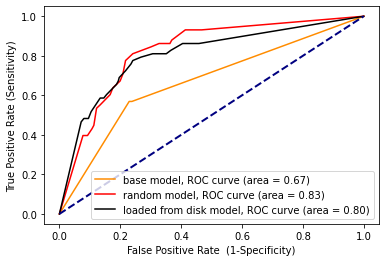

In [105]:
plt.figure()

plt.plot(fpr_a, tpr_a, color='darkorange', label='base model, ROC curve (area = %0.2f)' %  auc_a)
plt.plot(fpr_b, tpr_b, color='red', label='random model, ROC curve (area = %0.2f)' %  auc_b)
plt.plot(fpr_c, tpr_c, color='black', label='loaded from disk model, ROC curve (area = %0.2f)' %  auc_c)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

#### tree visualization

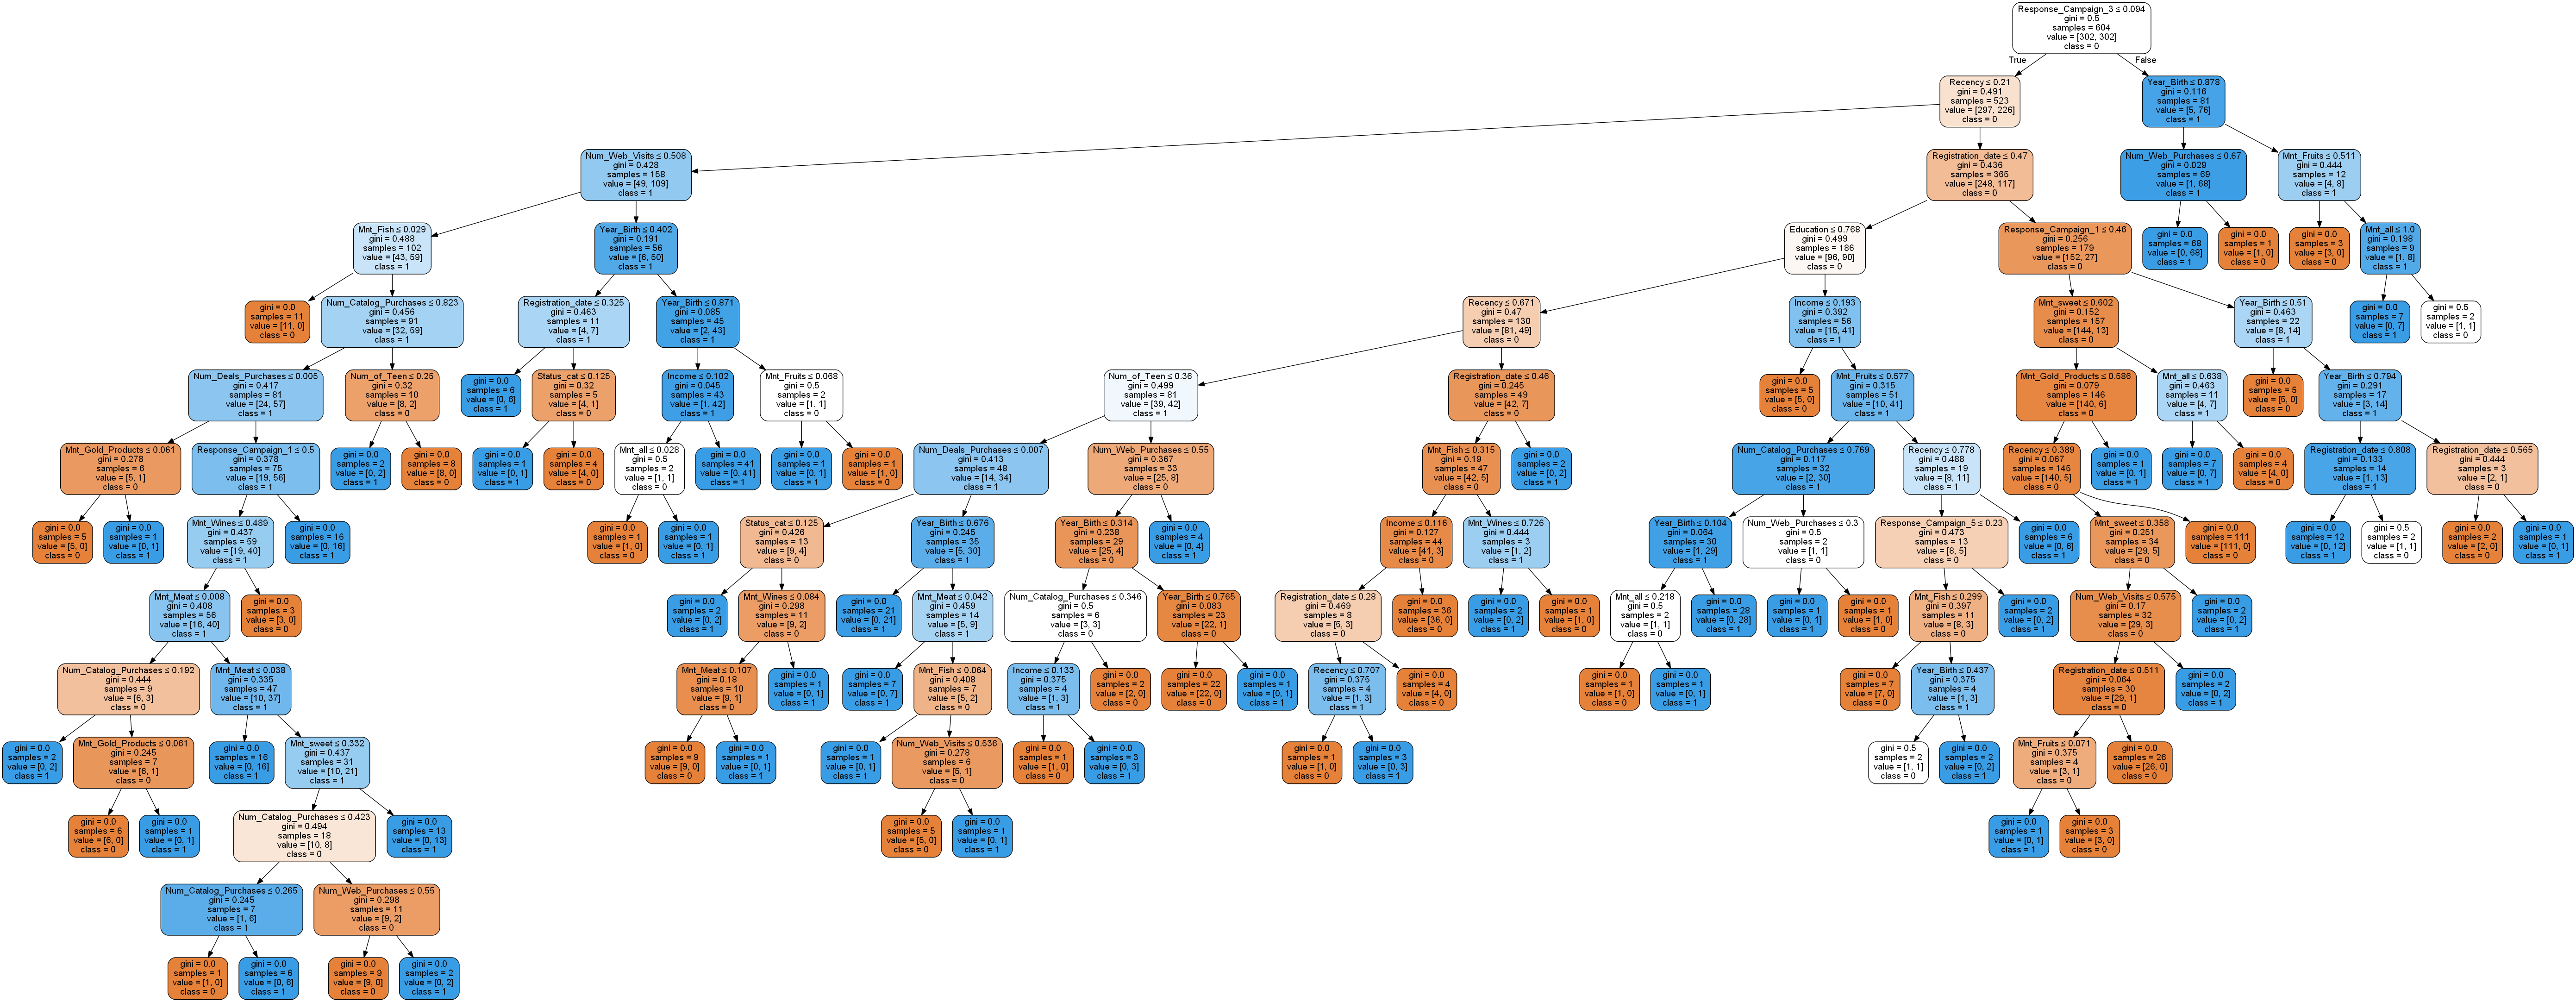

In [106]:
# base model 
dot = export_graphviz(clf, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree1.png')
Image(graph.create_png())

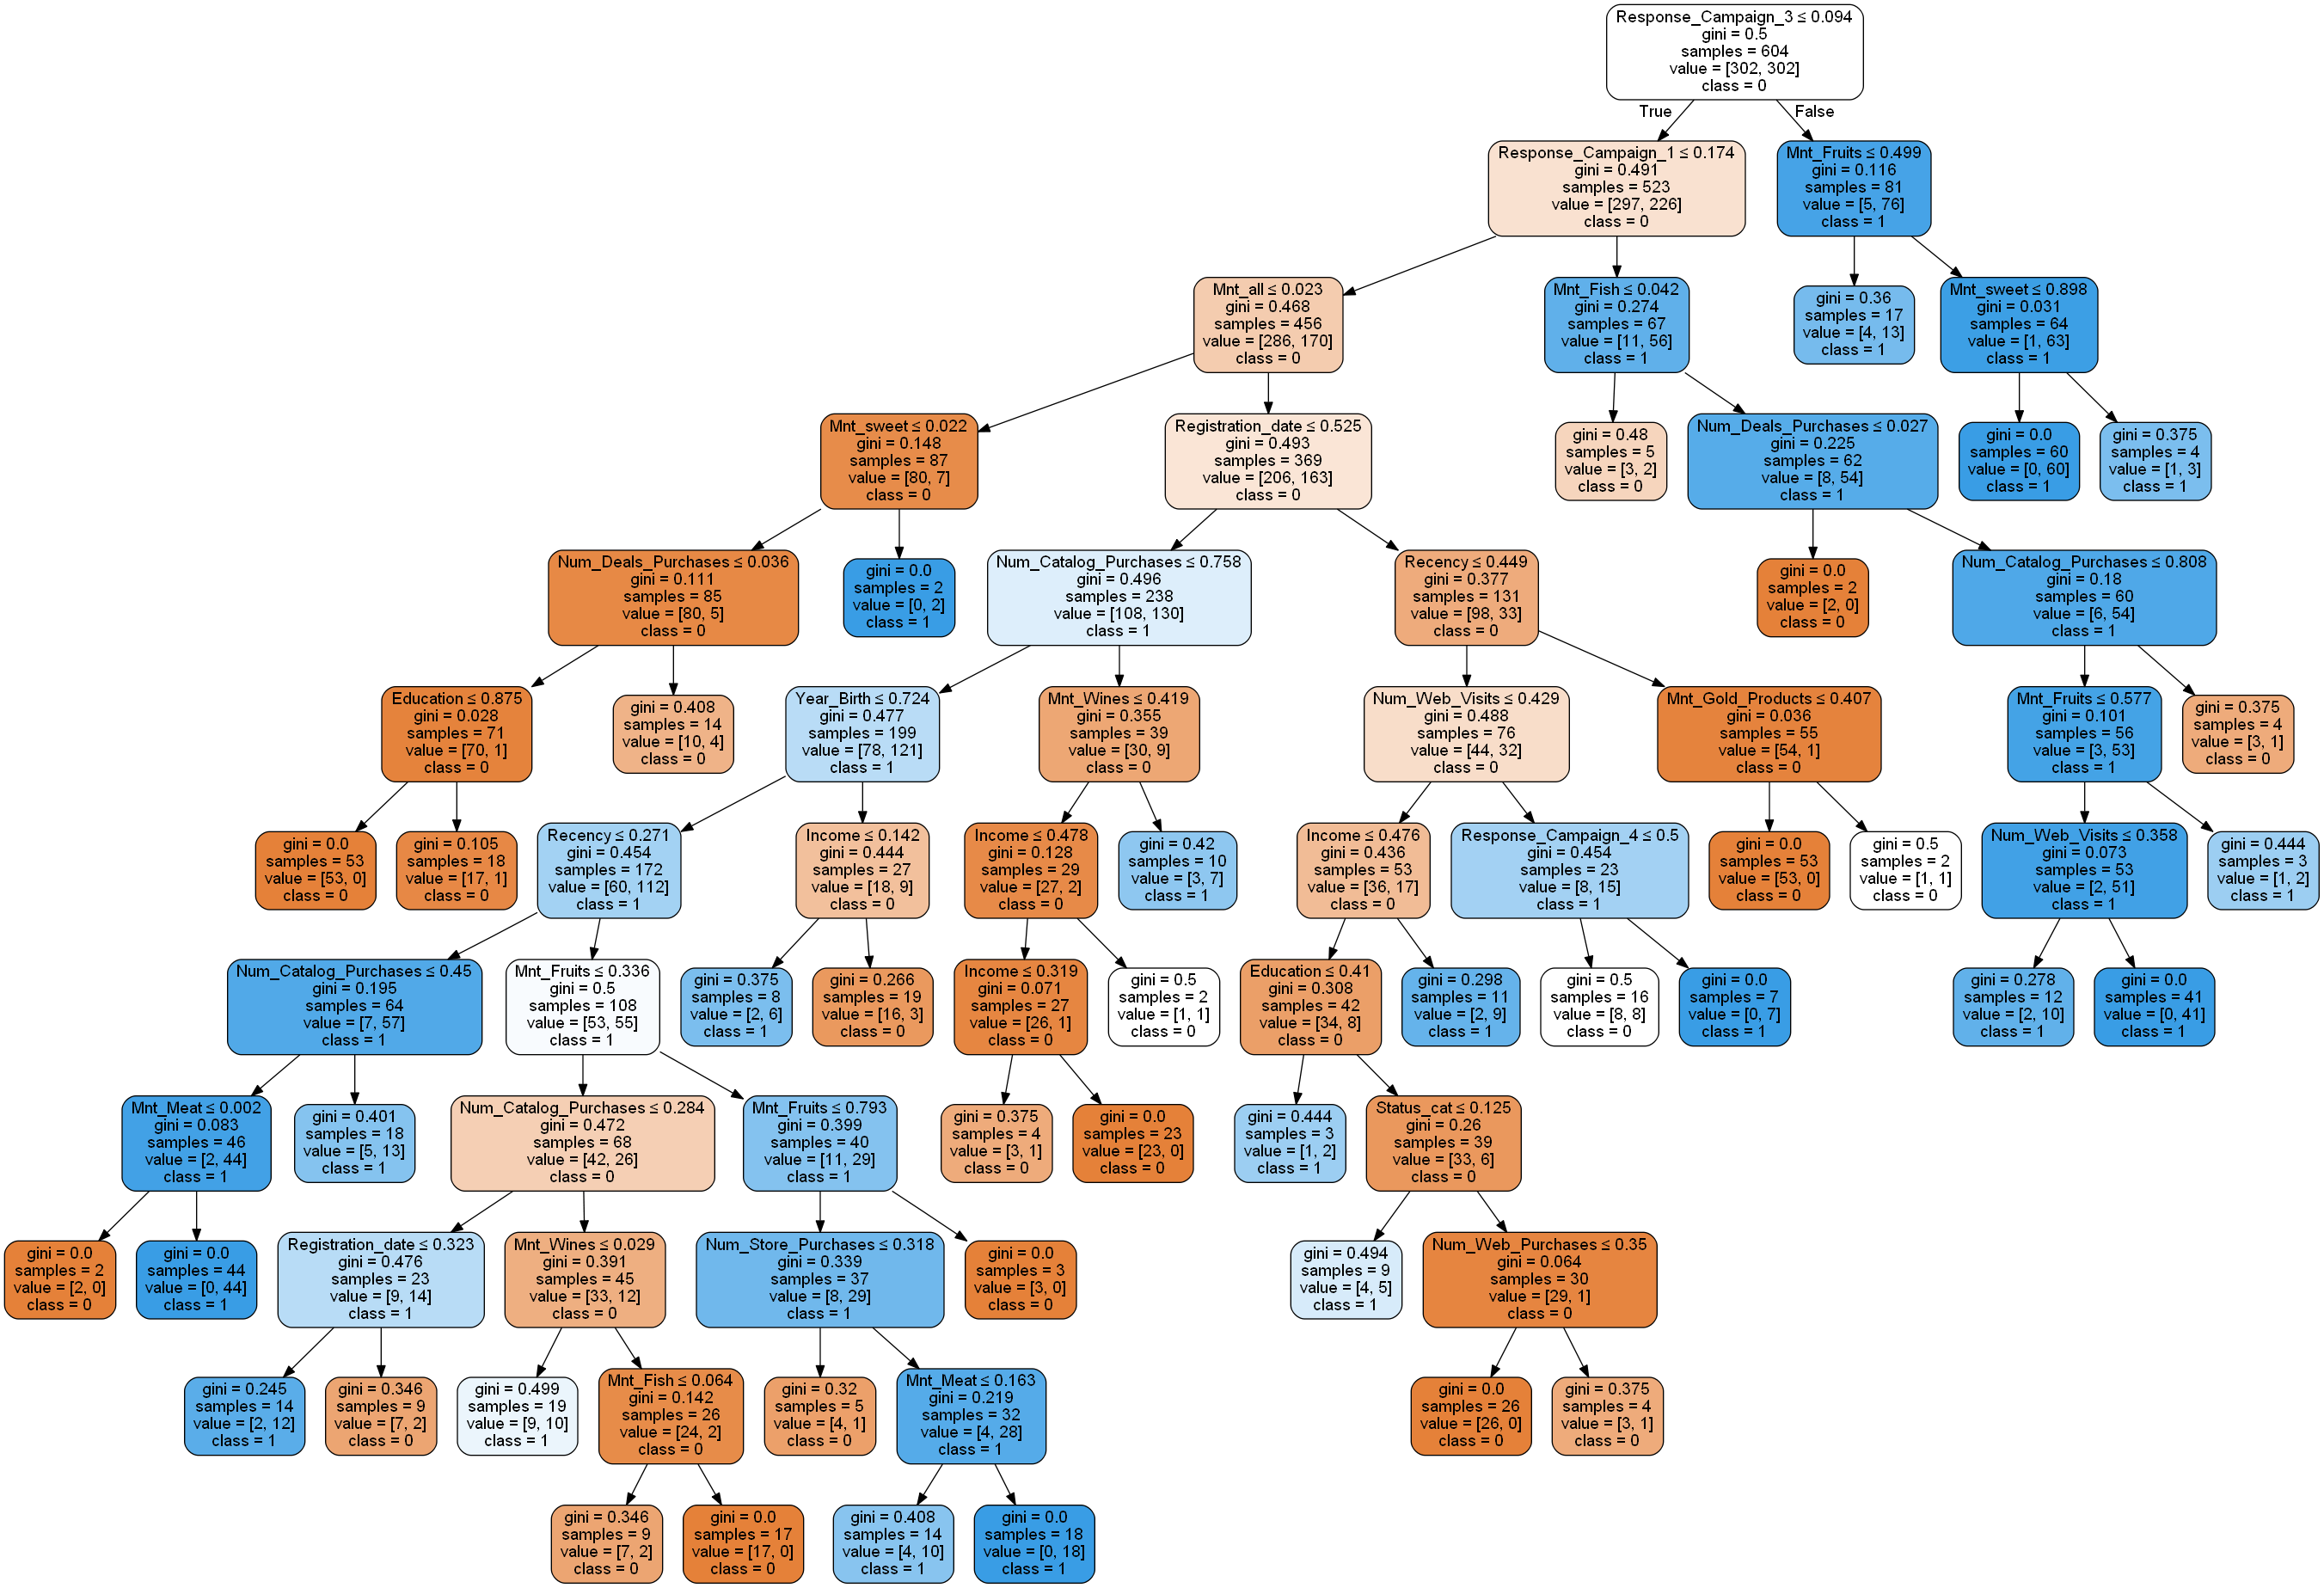

In [107]:
# random model 
dot = export_graphviz(best_random, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree2.png')
Image(graph.create_png())


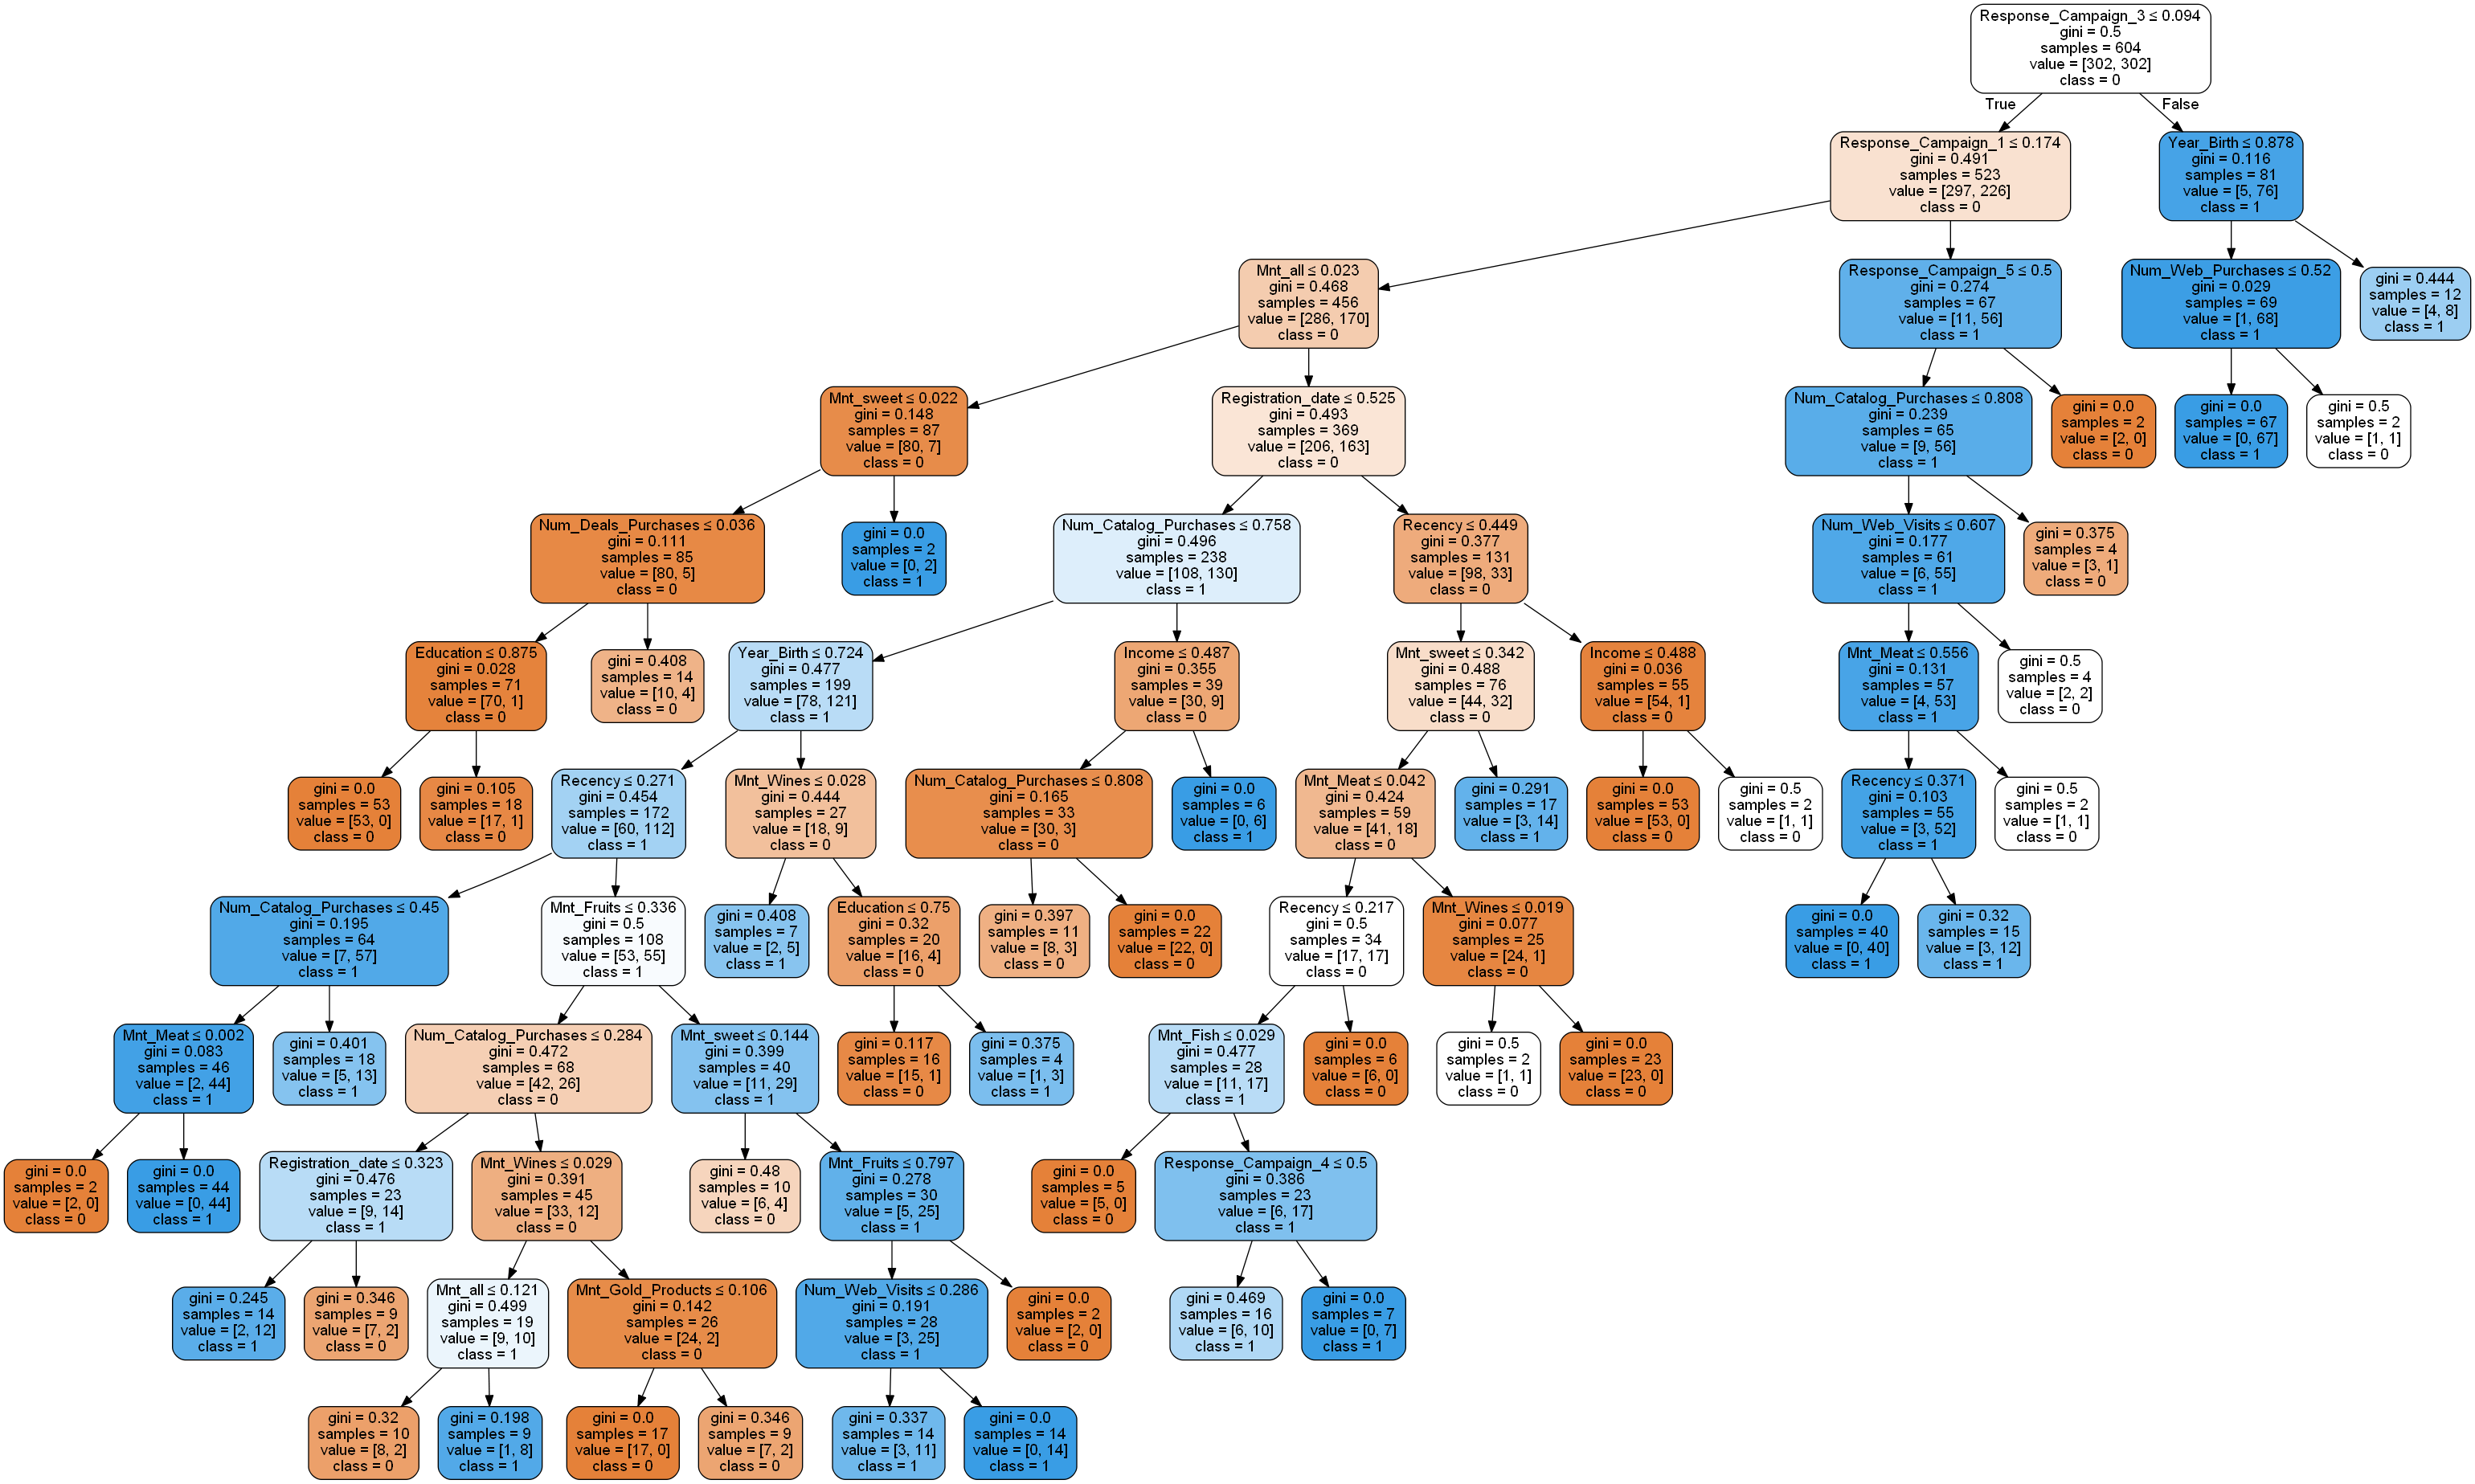

In [108]:
# loaded from disk model 
dot = export_graphviz(loaded_model, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree3.png')
Image(graph.create_png())

#### Save (If necessary) best model to disk

In [109]:
# Save model parameters 
# path = './saved_models/best_random_model.joblib'
# dump(best_random, path)
# Load the model from disk
# loaded_model = load(path)

# SVM classifier

In [110]:
df = pd.read_csv("./data/market_train_new.csv", index_col=0)
df = df.drop('Status', axis=1)  # stay with the categorical attribute 'Status_cat'

In [111]:
X = df.drop('Response', axis=1)
y = df['Response']

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42) 

In [113]:
# Balance the data
over = SMOTE(sampling_strategy=0.3, random_state = 42, k_neighbors = 5)
under = RandomUnderSampler(sampling_strategy=1, random_state = 42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.value_counts())
smote2_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train, columns =['Response'])], axis =1)
print(smote2_data['Response'].value_counts())

604
0.0    302
1.0    302
Name: Response, dtype: int64
0.0    302
1.0    302
Name: Response, dtype: int64


In [114]:
# create and fit the SVM model
clf_svm = svm.SVC(probability=True)
clf_1_svm = clf_svm.fit(X_train, y_train)


In [115]:
clf_1_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [116]:
# train acc and confusion matrix
y_train_pred = clf_1_svm.predict(X_train)
print("train acc: ",metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

train acc:  0.9139072847682119


,0,1
0,275,27
1,25,277


In [117]:
# val acc and confusion matrix
y_val_pred = clf_1_svm.predict(X_val)
print("val acc: ",metrics.accuracy_score(y_val, y_val_pred))
pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred))

val acc:  0.7944162436548223


,0,1
0,267,69
1,12,46


In [118]:
# define the grid
param_grid= {'kernel': ('linear', 'rbf'),
              'C': [1, 10, 100],
              'tol':[0.00001,0.001,0.0003,0.01]}
base_estimator = svm.SVC(probability=True)
best_estimatot = GridSearchCV(estimator = base_estimator, scoring='roc_auc_ovr_weighted',param_grid = param_grid, cv = 5)


In [119]:
# do grid search
best_estimatot.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf'),
                         'tol': [1e-05, 0.001, 0.0003, 0.01]},
             scoring='roc_auc_ovr_weighted')

In [120]:
best_estimatot.best_params_

{'C': 10, 'kernel': 'rbf', 'tol': 0.01}

In [121]:
# compare to base model
best_grid = best_estimatot.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = (best_grid.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
grid_accuracy = metrics.accuracy_score(y_val, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - metrics.accuracy_score(y_val, y_val_pred)) / metrics.accuracy_score(y_val, y_val_pred)))

grid model accuracy = 80.20%
Improvement of 0.96%.


In [122]:
print(classification_report(y_val, grid_y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87       336
         1.0       0.41      0.76      0.53        58

    accuracy                           0.80       394
   macro avg       0.68      0.78      0.70       394
weighted avg       0.87      0.80      0.82       394



In [123]:
best_grid.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.01,
 'verbose': False}

In [124]:
clf_1_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [125]:
grid_predictions = (best_grid.predict_proba(X_val)[:,1] >= 0.3).astype(bool)
# print classification report
print(classification_report(y_val, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       336
         1.0       0.36      0.83      0.50        58

    accuracy                           0.75       394
   macro avg       0.66      0.78      0.67       394
weighted avg       0.87      0.75      0.79       394



In [126]:
# get classification report
y_val_pred = (clf_1_svm.predict_proba(X_val)[:,1] >= 0.3).astype(bool)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82       336
         1.0       0.35      0.93      0.51        58

    accuracy                           0.74       394
   macro avg       0.67      0.82      0.66       394
weighted avg       0.89      0.74      0.77       394



In [127]:
# dump(best_grid, 'svm.joblib')

# Neural Network classifier

In [128]:
# load the train dataset
df = pd.read_csv("./data/market_train_new.csv", index_col=0)
df = df.drop('Status', axis=1)  # stay with the categorical attribute 'Status_cat'

In [129]:
X = df.drop('Response', axis=1)
y = df['Response']

In [130]:
# split to train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
# over-sample and under-sample to handle imbalanced data
over = SMOTE(sampling_strategy=0.3, random_state = 1, k_neighbors = 3)
under = RandomUnderSampler(sampling_strategy=0.9, random_state = 1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.value_counts())
smote2_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train, columns =['Response'])], axis =1)
print(smote2_data['Response'].value_counts())

637
0.0    335
1.0    302
Name: Response, dtype: int64
0.0    335
1.0    302
Name: Response, dtype: int64


In [132]:
# create the nn classifier 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)

In [133]:
# fit the modle to the train data
clf_1 = clf.fit(X_train, y_train)

In [134]:
# check validation acc and confusion matrix
y_val_pred = (clf_1.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
print("val acc: ",metrics.accuracy_score(y_val, y_val_pred))
pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred))

val acc:  0.8096446700507615


,0,1
0,275,61
1,14,44


In [135]:
# check train acc and confusion matrix
y_train_pred = clf_1.predict(X_train)
print("train acc: ",metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

train acc:  0.8555729984301413


,0,1
0,289,46
1,46,256


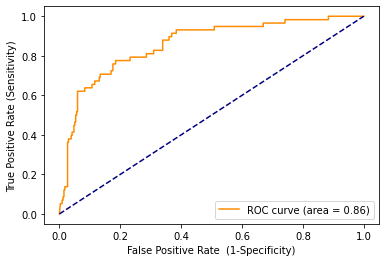

In [136]:
# ROC curve
y_probs_b = clf_1.predict_proba(X_val) # probability prediction
fpr_b, tpr_b, _ = metrics.roc_curve(y_val, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

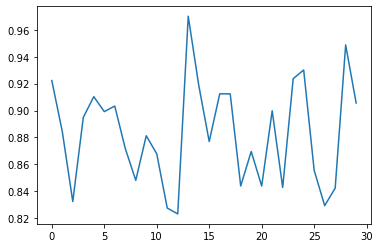

In [137]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
plt.plot(scores)
plt.show()

In [138]:
# get the parameters of the model
clf.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [139]:
# calculate the mean ROC
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', clf)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.874


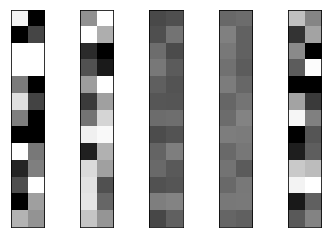

In [140]:
# plot the wheights of the nn
fig, axes = plt.subplots(1, 5)
vmin, vmax = clf_1.coefs_[0].min(), clf_1.coefs_[0].max()
for coef, ax in zip(clf_1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(13,2), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [141]:
print(metrics.classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       336
         1.0       0.42      0.76      0.54        58

    accuracy                           0.81       394
   macro avg       0.69      0.79      0.71       394
weighted avg       0.87      0.81      0.83       394



In [142]:
# save the model
# dump(clf_1, 'nn_1.joblib') 

# Neural Network Hyperparameter Tuning

In [143]:
# load the train dataset
df = pd.read_csv("./data/market_train_new.csv", index_col=0)
df = df.drop('Status', axis=1)  # stay with the categorical attribute 'Status_cat'

In [144]:
X = df.drop('Response', axis=1)
y = df['Response']


In [145]:
clf = MLPClassifier(solver='adam', alpha=1e-5,random_state=1)


In [146]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


In [147]:
over = SMOTE(sampling_strategy=0.3, random_state = 1)
under = RandomUnderSampler(sampling_strategy=0.9, random_state = 1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.value_counts())
smote2_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train, columns =['Response'])], axis =1)
print(smote2_data['Response'].value_counts())

637
0.0    335
1.0    302
Name: Response, dtype: int64
0.0    335
1.0    302
Name: Response, dtype: int64


In [148]:
clf.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [149]:
# define the grid
hidden_layer_sizes = [(3, ), (4, ), (5, ), (6, )]
max_iter = [200, 500, 1000]
learning_rate_init = [0.001, 0.01]
random_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter
}

In [150]:
# do grid search
clf_random = GridSearchCV(estimator = clf, param_grid = random_grid, cv = 10, verbose=2, n_jobs = -1)


In [151]:
# do grid search
clf_1 = clf_random.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [152]:
# get the best parameters
clf_1.best_params_

{'hidden_layer_sizes': (3,), 'learning_rate_init': 0.01, 'max_iter': 500}

In [153]:
# compare with regular model
clf.fit(X_train, y_train)
rf_y_pred = clf.predict(X_val)
rf_accuracy = metrics.accuracy_score(y_val, rf_y_pred)
print('base model accuracy = {:0.2f}%'.format(rf_accuracy*100))

best_random = clf_1.best_estimator_
random_y_pred = best_random.predict(X_val)
random_accuracy = metrics.accuracy_score(y_val, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - rf_accuracy) / rf_accuracy))

base model accuracy = 80.96%
random model accuracy = 80.71%
Improvement of -0.31%.


C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [154]:
clf_1 = best_random

In [155]:
# validation acc and confusion matrix
y_val_pred = (clf_1.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
print("val acc: ",metrics.accuracy_score(y_val, y_val_pred))
pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred))

val acc:  0.8071065989847716


,0,1
0,272,64
1,12,46


In [156]:
# train acc and confusion matrix
y_train_pred = clf_1.predict(X_train)
print("train acc: ",metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

train acc:  0.869701726844584


,0,1
0,291,44
1,39,263


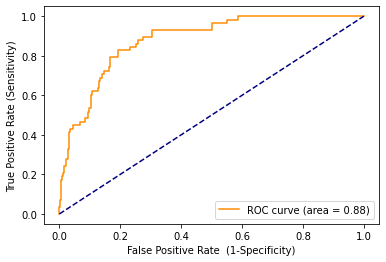

In [157]:
# ROC curve
y_probs_b = clf_1.predict_proba(X_val) # probability prediction
fpr_b, tpr_b, _ = metrics.roc_curve(y_val, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

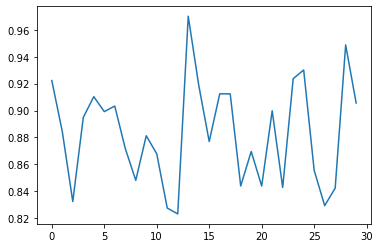

In [158]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
plt.plot(scores)
plt.show()

In [159]:
clf.get_params()


{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [160]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', clf)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.873


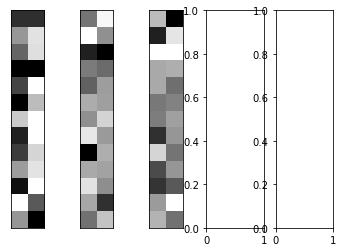

In [161]:
fig, axes = plt.subplots(1, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf_1.coefs_[0].min(), clf_1.coefs_[0].max()
for coef, ax in zip(clf_1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(13,2), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [162]:
print(metrics.classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       336
         1.0       0.42      0.79      0.55        58

    accuracy                           0.81       394
   macro avg       0.69      0.80      0.71       394
weighted avg       0.88      0.81      0.83       394



# Compare The Models

In [163]:
# load the train dataset
df = pd.read_csv("./data/market_train_new.csv", index_col=0)
df = df.drop('Status', axis=1)  # stay with the categorical attribute 'Status_cat'

In [164]:
X = df.drop('Response', axis=1)
y = df['Response']

In [165]:
# best models that we got
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
path =  r".\saved_models\dt.joblib"
clf_tree = load(path)
clf_svm = svm.SVC(probability=True,C=10, tol=1e-5)


In [166]:
clf_list = [clf_nn,clf_tree, clf_svm]
cm_dict, auc_dict = {}, {}
X = X.to_numpy()
y = y.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42) 
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    over = SMOTE(sampling_strategy=0.3, random_state = 1, k_neighbors = 3)
    under = RandomUnderSampler(sampling_strategy=0.9, random_state = 1)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X_train, y_train = pipeline.fit_resample(X_train, y_train)
    smote2_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train, columns =['Response'])], axis =1)
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)

        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.8037974683544303
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.7658227848101266


C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.810126582278481
------ 2 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.8291139240506329
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.7658227848101266
Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8354430379746836
------ 3 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.7974683544303798
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.7088607594936709


C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.7911392405063291
------ 4 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.8607594936708861
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.7341772151898734
Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8227848101265823
------ 5 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.8481012658227848
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.8037974683544303
Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8544303797468354
------ 6 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), r

C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8544303797468354
------ 7 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.802547770700637
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.8152866242038217


C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8343949044585988
------ 8 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.8280254777070064
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.802547770700637
Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8789808917197452
------ 9 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.7452229299363057
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.6751592356687898


C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8343949044585988
------ 10 ------
Classifier:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
Accuracy:  0.8662420382165605
Classifier:  DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
Accuracy:  0.7898089171974523


C:\Users\Ido\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classifier:  SVC(C=10, probability=True, tol=1e-05)
Accuracy:  0.8535031847133758


In [167]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')
mean accuracy:  0.8191405305168104
mean recall:  0.7148641304347827
mean AUC:  0.8545951358702979
DecisionTreeClassifier(max_depth=17, max_features=10, min_samples_leaf=2,
                       min_samples_split=19, random_state=42)
mean accuracy:  0.7627106345239055
mean recall:  0.5678940715082019
mean AUC:  0.7558039478754379
SVC(C=10, probability=True, tol=1e-05)
mean accuracy:  0.8369628315730064
mean recall:  0.7148227557466688
mean AUC:  0.8892187359916853


In [168]:
# t-test
ttest,pval = stats.ttest_rel(acc_dict[clf_nn], acc_dict[clf_svm])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.15886097848638023
accept null hypothesis


In [169]:
# t-test
ttest,pval = stats.ttest_rel(recall_dict[clf_nn], recall_dict[clf_svm])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9986891306508563
accept null hypothesis


In [170]:
# t-test
ttest,pval = stats.ttest_rel(auc_dict[clf_nn], auc_dict[clf_svm])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.08007255897722165
accept null hypothesis
